In [260]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import statsmodels.api as sm
import math
from matplotlib.ticker import MaxNLocator
from fbprophet import Prophet #maybe change this from prophet import Prophet
import squarify

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from IPython.display import HTML
from subprocess import check_output
# Any results you write to the current directory are saved as output.

pd.options.display.max_columns = 999 
pd.options.display.max_rows = 999 

In [2]:
#Load the data
State_time_series=pd.read_csv("C:/Users/owner/Desktop/cpsc599/project/zillow-economics/State_time_series.csv",parse_dates=True)
State_time_series.Date=pd.to_datetime(State_time_series.Date)
State_time_series['year'] = State_time_series.Date.dt.year

In [4]:
State_time_series.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,MedianRentalPrice_1Bedroom,MedianRentalPrice_2Bedroom,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,year
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61500.0,48900.0,78200.0,146500.0,206300.0,79500.0,45600.0,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN,1996
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59200.0,86400.0,96100.0,128400.0,190500.0,103600.0,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN,1996
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53000.0,54500.0,76800.0,135100.0,186000.0,64400.0,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN,1996
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [59]:
State_time_series.shape

(13212, 84)

In [57]:
State_time_series.isnull().sum()

Date                                                                 0
RegionName                                                           0
DaysOnZillow_AllHomes                                             8367
InventorySeasonallyAdjusted_AllHomes                              8316
InventoryRaw_AllHomes                                             8316
MedianListingPricePerSqft_1Bedroom                                9626
MedianListingPricePerSqft_2Bedroom                                8678
MedianListingPricePerSqft_3Bedroom                                8605
MedianListingPricePerSqft_4Bedroom                                8535
MedianListingPricePerSqft_5BedroomOrMore                          8643
MedianListingPricePerSqft_AllHomes                                8538
MedianListingPricePerSqft_CondoCoop                               9063
MedianListingPricePerSqft_DuplexTriplex                           9248
MedianListingPricePerSqft_SingleFamilyResidence                   8573
Median

In [68]:
us_df = State_time_series.dropna()
us_df.shape

(66, 84)

In [69]:
us_df.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,MedianRentalPrice_1Bedroom,MedianRentalPrice_2Bedroom,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,year,Year
10669,2013-12-31,California,73.75,71512.0,68428.0,335.704695,242.494226,219.166788,221.204285,234.005566,236.713500,282.969737,220.050441,225.346535,249900.0,285000.0,359900.0,489000.0,725000.0,398500.0,347700.0,484000.0,406990.0,3.448276,3.244120,3.474903,10500.0,10000.0,11000.0,2.129508,1.666667,1.255766,1.008902,0.836364,1.298932,1.704545,1.416058,1.769231,1.122544,2.259036,1388.0,1695.0,1850.0,2100.0,2450.0,1900.0,1995.0,1250.0,1645.0,1895.0,1200.0,258.0,3.43,95.50,80.40,19.60,12.446901,11.378692,12.672961,9.701009,9.157315,9.816240,16.52,33387.0,35946.0,366100.0,255300.0,322900.0,372900.0,477200.0,645200.0,395100.0,196600.0,361600.0,395100.0,402000.0,748700.0,2010.0,1983.0,1.306,1865.0,2023.0,2013,2013
10721,2014-01-31,California,78.75,72514.0,62335.0,328.947368,237.630208,211.609355,214.424301,227.272727,230.551553,281.101685,214.118608,217.710412,248900.0,279900.0,349900.0,472225.0,699000.0,385000.0,340000.0,470900.0,398080.0,3.333333,3.073286,3.348144,10100.0,10000.0,10900.0,2.133333,1.680653,1.251626,1.018742,0.837213,1.296758,1.695401,1.409518,1.777778,1.125402,2.252409,1400.0,1700.0,1850.0,2099.0,2450.0,1900.0,1999.0,1250.0,1650.0,1850.0,1250.0,259.0,3.64,95.21,81.74,18.26,13.130186,12.118297,13.349069,12.822443,12.139473,12.972856,16.63,26651.0,36512.0,367700.0,257300.0,325200.0,375800.0,480200.0,649400.0,397600.0,199300.0,363500.0,397600.0,404700.0,753100.0,2016.0,1988.0,1.308,1868.0,2027.0,2014,2014
10773,2014-02-28

In [64]:
us_df['RegionName'].unique()

array(['California', 'Colorado'], dtype=object)

In [102]:
region_price = State_time_series[['RegionName','MedianListingPrice_AllHomes']]

In [97]:
State_time_series[['RegionName','MedianListingPrice_AllHomes']].sort_values(by=['MedianListingPrice_AllHomes'], ascending=False).head()

,RegionName,MedianListingPrice_AllHomes
13172,Hawaii,610000.0
12860,Hawaii,610000.0
12912,Hawaii,600000.0
12808,Hawaii,599900.0
12964,Hawaii,599250.0


In [113]:
region_price.groupby('RegionName').mean().sort_values(by=['MedianListingPrice_AllHomes'], ascending=False).head(8)

,MedianListingPrice_AllHomes
RegionName,
Hawaii,498488.723958
California,451017.520000
DistrictofColumbia,436564.171875
Massachusetts,340491.666667
NewYork,324139.573770
Colorado,298270.473958
NewJersey,288139.360656
Connecticut,280132.170213


In [70]:
#let's group data by year and extract the year out to get the info we need in time series arrangment in datetime formet 
us_df['Date'] = pd.to_datetime(State_time_series['Date'])
us_df['Year'] = us_df['Date'].apply(lambda x: x.year)


C:\Users\owner\anaconda3\envs\ml_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\owner\anaconda3\envs\ml_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



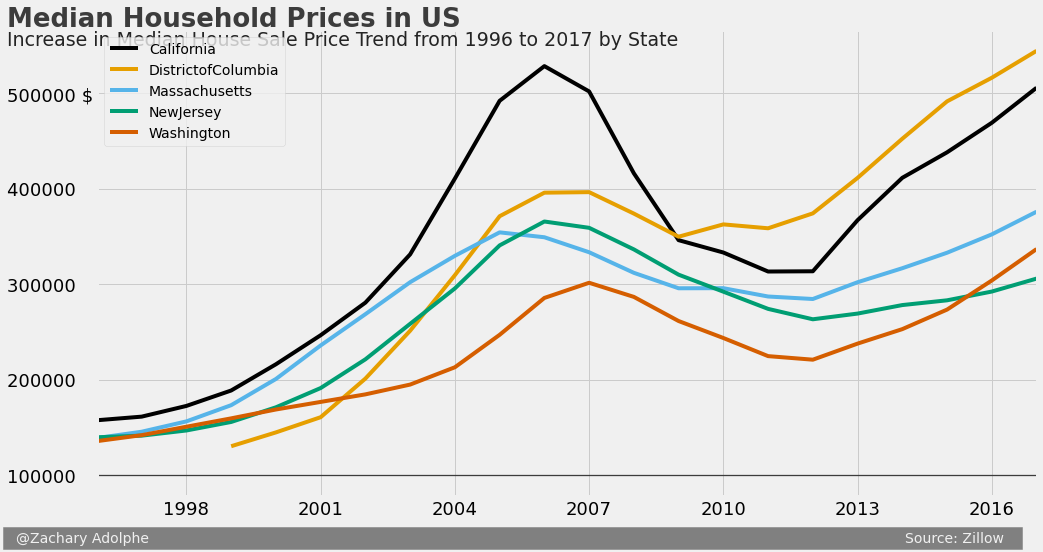

In [67]:
# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255], 
          [213/255,94/255,0], [0,114/255,178/255]]


States_year_SalePrices=State_time_series_year.groupby([State_time_series_year.year,State_time_series_year.RegionName])['ZHVI_AllHomes'].mean().dropna().reset_index(name='SoldPrice')
fte_graph=States_year_SalePrices.pivot(index='year', columns='RegionName', values='SoldPrice').plot(figsize=(15,8), color=colors, legend=False)
fte_graph.figure.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.xlabel("")
fte_graph.set_yticklabels(labels = [-10, '100000   ', '200000   ',  '300000   ', '400000   ',  '500000 $'])
# Generate a bolded horizontal line at y = 0 
fte_graph.axhline(y = 100000, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
fte_graph.set_xlim(left = 1996, right = 2017)
# The signature bar

fte_graph.text(x = 1994, y = 30000,
    s = '  @Zachary Adolphe                                                                                                                                                                        Source: Zillow   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')


# Adding a title and a subtitle
fte_graph.text(x = 1994, y = 570000, s = "Median Household Prices in US",
               fontsize = 26, weight = 'bold', alpha = .75)
fte_graph.text(x = 1994, y = 550000, 
               s = 'Increase in Median House Sale Price Trend from 1996 to 2017 by State',
              fontsize = 19, alpha = .85)

plt.legend(loc="upper left")

plt.savefig('prices-state')

In [7]:
#let's group data by year and extract the year out to get the info we need in time series arrangment in datetime formet 
State_time_series['Date'] = pd.to_datetime(State_time_series['Date'])
State_time_series['Year'] = State_time_series['Date'].apply(lambda x: x.year)


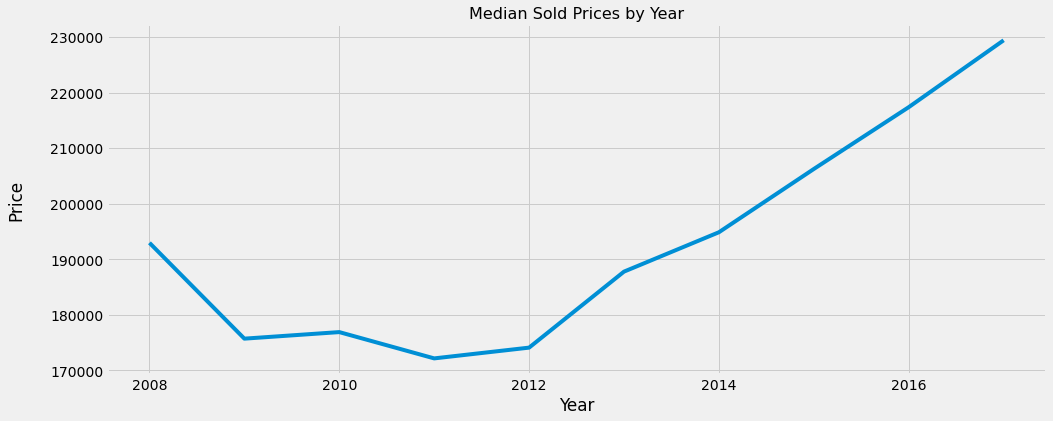

In [39]:
#let's start off with by simply looking at the median sale price to get some context and idea of an early trend
fig, ax = plt.subplots()
#ax2 = ax.twinx()
sale_price = State_time_series.groupby(State_time_series['Year'])['Sale_Prices'].mean().dropna()
sale_price.plot(linewidth=4, figsize=(15, 6))
#price_counts = State_time_series.groupby(State_time_series['Year'])['Sale_Counts'].mean().dropna()
#price_counts.plot(linewidth=4, figsize=(15, 6))

plt.title('Median Sold Prices by Year', fontsize=16)
plt.ylabel('Price\n')
#the file saving must be before show it the image will be blank
plt.savefig('median-sale-price.png')
plt.show()



In [ ]:
fig,ax = plt.subplots()
ax.plot(sale_price

ax2.twinx()
ax2.plot(price_counts, linewidth=4, figsize=(15, 6)

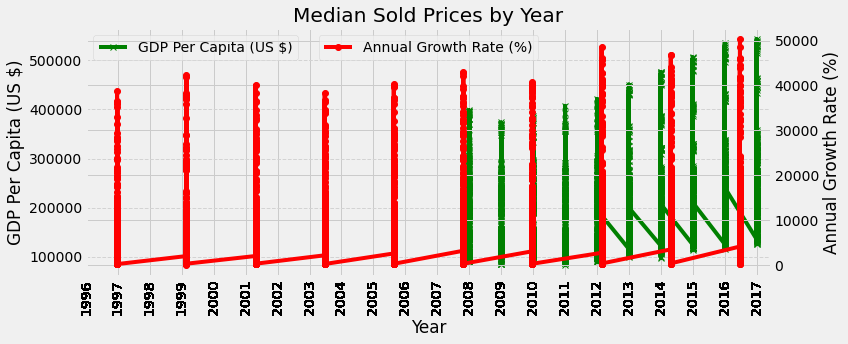

In [29]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Median Sold Prices by Year')
ax.set_xlabel('Year')

State_time_series.groupby(State_time_series['Year'])['Sale_Prices'].mean().dropna()
ax.plot(State_time_series['Year'], State_time_series['Sale_Prices'], color='green', marker='x')
ax2.plot(State_time_series['Year'], State_time_series['Sale_Counts'], color='red', marker='o')
ax.set_ylabel('GDP Per Capita (US $)')
ax2.set_ylabel('Annual Growth Rate (%)')
ax.legend(['GDP Per Capita (US $)'])
ax2.legend(['Annual Growth Rate (%)'], loc='upper center')
ax.set_xticks(State_time_series['Year'])
ax.set_xticklabels(State_time_series['Year'], rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

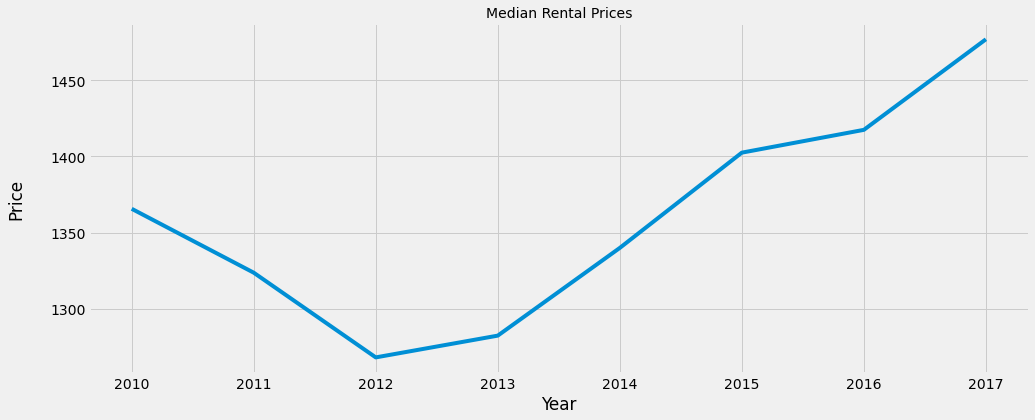

In [41]:
State_time_series.groupby(State_time_series['Year'])['MedianRentalPrice_AllHomes'].mean().dropna().plot(linewidth=4, figsize=(15, 6))
plt.title('Median Rental Prices', fontsize=14)
plt.ylabel('Price\n')
plt.savefig('median-rental')
plt.show()

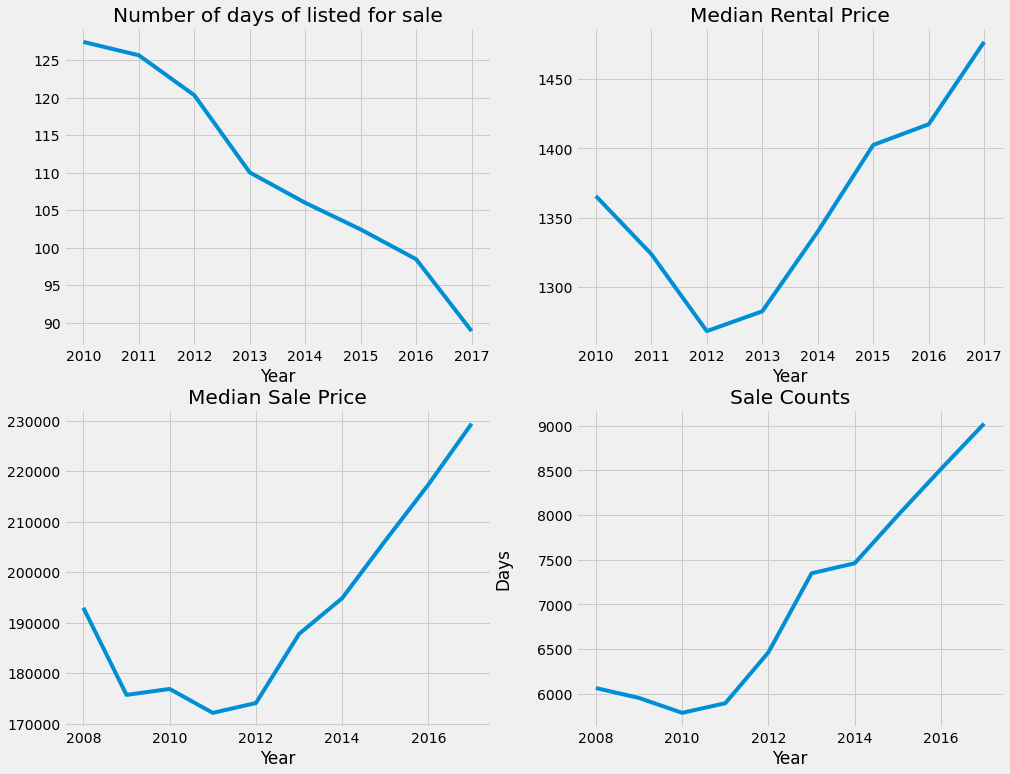

In [48]:
#there is laso a column on how long a house was listed for, lets look at how long that and how that has changed over the years
fig, ax = plt.subplots(2,2, figsize=(15,12))

State_time_series.groupby(State_time_series['Year'])['DaysOnZillow_AllHomes'].mean().dropna().plot(linewidth=4, ax=ax[0, 0])
State_time_series.groupby(State_time_series['Year'])['Sale_Prices'].mean().dropna().plot(linewidth=4, ax=ax[1, 0])
State_time_series.groupby(State_time_series['Year'])['Sale_Counts'].mean().dropna().plot(linewidth=4, ax=ax[1, 1])
State_time_series.groupby(State_time_series['Year'])['MedianRentalPrice_AllHomes'].mean().dropna().plot(linewidth=4, ax=ax[0, 1])

ax[0, 0].set_title('Number of days of listed for sale')
ax[0, 1].set_title('Median Rental Price')
ax[1, 0].set_title('Median Sale Price')
ax[1, 1].set_title('Sale Counts')
plt.ylabel('Days\n')
plt.savefig('trend-measures')
plt.show()

In [52]:
#Get costliest states
states = set(State_time_series[
    ~State_time_series['ZHVI_AllHomes'].isnull() &
    ~State_time_series['Sale_Prices'].isnull()
                      ]['RegionName'].values)

State_time_series_year = State_time_series[State_time_series['RegionName'].isin(states)].copy()
highest_cost_states = State_time_series_year[['RegionName', 'ZHVI_AllHomes']].groupby('RegionName').max().sort_values(by=['ZHVI_AllHomes'], ascending=False)[:5].index.values.tolist()
State_time_series_year=State_time_series_year[State_time_series_year.RegionName.isin(highest_cost_states)]
State_time_series_year.year = State_time_series_year.Date.dt.year

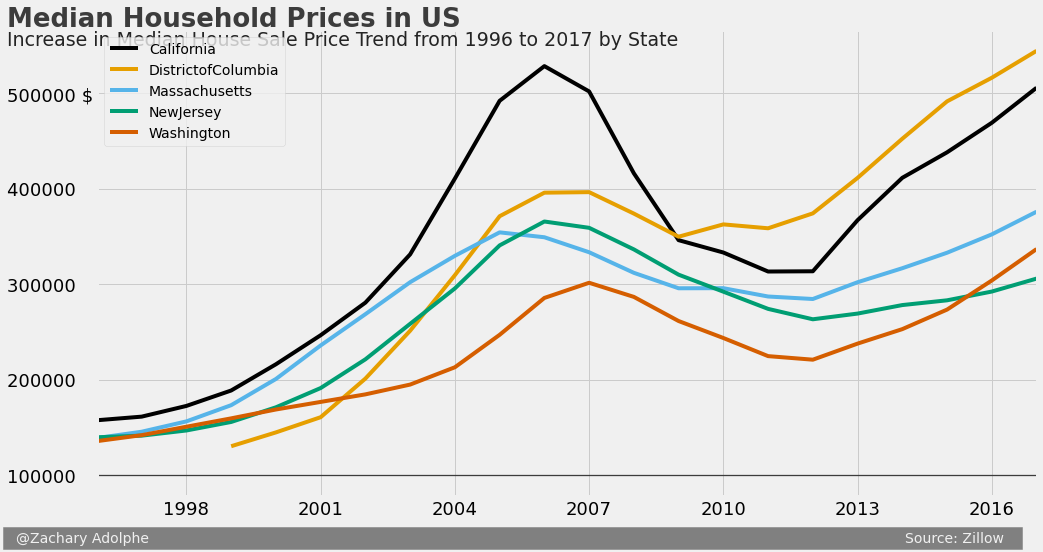

In [54]:
# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255], 
          [213/255,94/255,0], [0,114/255,178/255]]


States_year_SalePrices=State_time_series_year.groupby([State_time_series_year.year,State_time_series_year.RegionName])['ZHVI_AllHomes'].mean().dropna().reset_index(name='SoldPrice')
fte_graph=States_year_SalePrices.pivot(index='year', columns='RegionName', values='SoldPrice').plot(figsize=(15,8), color=colors, legend=False)
fte_graph.figure.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.xlabel("")
fte_graph.set_yticklabels(labels = [-10, '100000   ', '200000   ',  '300000   ', '400000   ',  '500000 $'])
# Generate a bolded horizontal line at y = 0 
fte_graph.axhline(y = 100000, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
fte_graph.set_xlim(left = 1996, right = 2017)
# The signature bar

fte_graph.text(x = 1994, y = 30000,
    s = '  @Zachary Adolphe                                                                                                                                                                        Source: Zillow   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')


# Adding a title and a subtitle
fte_graph.text(x = 1994, y = 570000, s = "Median Household Prices in US",
               fontsize = 26, weight = 'bold', alpha = .75)
fte_graph.text(x = 1994, y = 550000, 
               s = 'Increase in Median House Sale Price Trend from 1996 to 2017 by State',
              fontsize = 19, alpha = .85)


plt.legend(loc="upper left")

plt.savefig('prices-state')


No handles with labels found to put in legend.


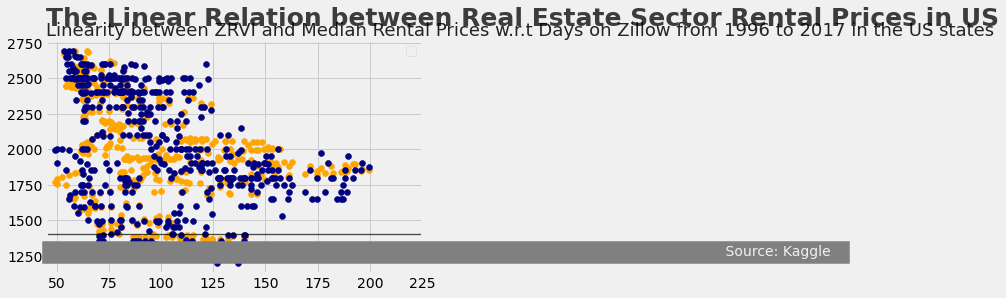

In [116]:
plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.ZRI_AllHomes,c="orange")
plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.MedianRentalPrice_AllHomes,c="navy");

# Generate a bolded horizontal line at y = 0 
plt.axhline(y = 1400, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
plt.xlim(left = 45, right = 225)
# The signature bar

plt.text(x = 45, y = 1250,
    s = '                                                                                                                                                       Source: Kaggle   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.legend(fontsize=12,loc='best',frameon=1,fancybox=1)
# Adding a title and a subtitle
plt.text(x = 45, y = 2870, s = "The Linear Relation between Real Estate Sector Rental Prices in US",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 45, y = 2800, 
               s = 'Linearity between ZRVI and Median Rental Prices w.r.t Days on Zillow from 1996 to 2017 in the US states',
              fontsize = 18, alpha = .85);

In [126]:
State_time_series_year.head()


,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,MedianRentalPrice_1Bedroom,MedianRentalPrice_2Bedroom,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,year,Year
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93700.0,123400.0,150900.0,196100.0,265300.0,157900.0,95100.0,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN,1996,1996
19,1996-04-30,Massachusetts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82900.0,106600.0,136300.0,195400.0,249200.0,137300.0,87900.0,103100.0,137300.0,144300.0,229300.0,NaN,NaN,NaN,NaN,NaN,1996,1996
27,1996-04-30,NewJersey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89700.0,108800.0,131300.0,181400.0,226100.0,140300.0,88500.0,95400.0,140300.0,144200.0,228600.0,NaN,NaN,NaN,NaN,NaN,1996,1996
41,1996-04-30,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0

In [234]:
State_time_series_year.isnull().count()

Date                                                             1277
RegionName                                                       1277
DaysOnZillow_AllHomes                                            1277
InventorySeasonallyAdjusted_AllHomes                             1277
InventoryRaw_AllHomes                                            1277
MedianListingPricePerSqft_1Bedroom                               1277
MedianListingPricePerSqft_2Bedroom                               1277
MedianListingPricePerSqft_3Bedroom                               1277
MedianListingPricePerSqft_4Bedroom                               1277
MedianListingPricePerSqft_5BedroomOrMore                         1277
MedianListingPricePerSqft_AllHomes                               1277
MedianListingPricePerSqft_CondoCoop                              1277
MedianListingPricePerSqft_DuplexTriplex                          1277
MedianListingPricePerSqft_SingleFamilyResidence                  1277
MedianListingPrice_1

In [204]:
pred_df =State_time_series_year.dropna()

In [205]:
pred_df.shape

(46, 84)

In [206]:
pred_df.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,MedianRentalPrice_1Bedroom,MedianRentalPrice_2Bedroom,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,year,Year
10669,2013-12-31,California,73.75,71512.0,68428.0,335.704695,242.494226,219.166788,221.204285,234.005566,236.713500,282.969737,220.050441,225.346535,249900.0,285000.0,359900.0,489000.0,725000.0,398500.0,347700.0,484000.0,406990.0,3.448276,3.244120,3.474903,10500.0,10000.0,11000.0,2.129508,1.666667,1.255766,1.008902,0.836364,1.298932,1.704545,1.416058,1.769231,1.122544,2.259036,1388.0,1695.0,1850.0,2100.0,2450.0,1900.0,1995.0,1250.0,1645.0,1895.0,1200.0,258.0,3.43,95.50,80.40,19.60,12.446901,11.378692,12.672961,9.701009,9.157315,9.816240,16.52,33387.0,35946.0,366100.0,255300.0,322900.0,372900.0,477200.0,645200.0,395100.0,196600.0,361600.0,395100.0,402000.0,748700.0,2010.0,1983.0,1.306,1865.0,2023.0,2013,2013
10721,2014-01-31,California,78.75,72514.0,62335.0,328.947368,237.630208,211.609355,214.424301,227.272727,230.551553,281.101685,214.118608,217.710412,248900.0,279900.0,349900.0,472225.0,699000.0,385000.0,340000.0,470900.0,398080.0,3.333333,3.073286,3.348144,10100.0,10000.0,10900.0,2.133333,1.680653,1.251626,1.018742,0.837213,1.296758,1.695401,1.409518,1.777778,1.125402,2.252409,1400.0,1700.0,1850.0,2099.0,2450.0,1900.0,1999.0,1250.0,1650.0,1850.0,1250.0,259.0,3.64,95.21,81.74,18.26,13.130186,12.118297,13.349069,12.822443,12.139473,12.972856,16.63,26651.0,36512.0,367700.0,257300.0,325200.0,375800.0,480200.0,649400.0,397600.0,199300.0,363500.0,397600.0,404700.0,753100.0,2016.0,1988.0,1.308,1868.0,2027.0,2014,2014
10773,2014-02-28

In [207]:
price_df['Sale_Prices','ZHVI_AllHomes']

ValueError: key of type tuple not found and not a MultiIndex

In [208]:
#lets encode first and create dummy vars
regions= pred_df['RegionName']
regions = pd.get_dummies(pred_df.RegionName)
regions.head() #sometimes you are suppose to drop one column for dummies 

,California
10669,1
10721,1
10773,1
10825,1
10877,1


In [199]:
#regions.drop('Washington', axis="columns")
regions.shape

(46, 1)

In [200]:
cols = pred_df[['DaysOnZillow_AllHomes', 'InventoryRaw_AllHomes', 'MedianRentalPrice_AllHomes', 'Sale_Counts', 'Sale_Prices']]
cols.shape

(46, 5)

In [201]:
cols.head()

,DaysOnZillow_AllHomes,InventoryRaw_AllHomes,MedianRentalPrice_AllHomes,Sale_Counts,Sale_Prices
10669,73.75,68428.0,1900.0,33387.0,366100.0
10721,78.75,62335.0,1900.0,26651.0,367700.0
10773,75.25,66856.0,1850.0,26509.0,369900.0
10825,66.50,70808.0,1850.0,32538.0,373100.0
10877,62.25,76157.0,1850.0,38210.0,375700.0


In [209]:

pred_df.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,MedianRentalPrice_1Bedroom,MedianRentalPrice_2Bedroom,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,year,Year
10669,2013-12-31,California,73.75,71512.0,68428.0,335.704695,242.494226,219.166788,221.204285,234.005566,236.713500,282.969737,220.050441,225.346535,249900.0,285000.0,359900.0,489000.0,725000.0,398500.0,347700.0,484000.0,406990.0,3.448276,3.244120,3.474903,10500.0,10000.0,11000.0,2.129508,1.666667,1.255766,1.008902,0.836364,1.298932,1.704545,1.416058,1.769231,1.122544,2.259036,1388.0,1695.0,1850.0,2100.0,2450.0,1900.0,1995.0,1250.0,1645.0,1895.0,1200.0,258.0,3.43,95.50,80.40,19.60,12.446901,11.378692,12.672961,9.701009,9.157315,9.816240,16.52,33387.0,35946.0,366100.0,255300.0,322900.0,372900.0,477200.0,645200.0,395100.0,196600.0,361600.0,395100.0,402000.0,748700.0,2010.0,1983.0,1.306,1865.0,2023.0,2013,2013
10721,2014-01-31,California,78.75,72514.0,62335.0,328.947368,237.630208,211.609355,214.424301,227.272727,230.551553,281.101685,214.118608,217.710412,248900.0,279900.0,349900.0,472225.0,699000.0,385000.0,340000.0,470900.0,398080.0,3.333333,3.073286,3.348144,10100.0,10000.0,10900.0,2.133333,1.680653,1.251626,1.018742,0.837213,1.296758,1.695401,1.409518,1.777778,1.125402,2.252409,1400.0,1700.0,1850.0,2099.0,2450.0,1900.0,1999.0,1250.0,1650.0,1850.0,1250.0,259.0,3.64,95.21,81.74,18.26,13.130186,12.118297,13.349069,12.822443,12.139473,12.972856,16.63,26651.0,36512.0,367700.0,257300.0,325200.0,375800.0,480200.0,649400.0,397600.0,199300.0,363500.0,397600.0,404700.0,753100.0,2016.0,1988.0,1.308,1868.0,2027.0,2014,2014
10773,2014-02-28

In [223]:
X = cols.drop('Sale_Prices', axis='columns')
X.shape

(46, 4)

In [222]:
X.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,MedianRentalPrice_1Bedroom,MedianRentalPrice_2Bedroom,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental,year,Year
10669,2013-12-31,California,73.75,71512.0,68428.0,335.704695,242.494226,219.166788,221.204285,234.005566,236.713500,282.969737,220.050441,225.346535,249900.0,285000.0,359900.0,489000.0,725000.0,398500.0,347700.0,484000.0,406990.0,3.448276,3.244120,3.474903,10500.0,10000.0,11000.0,2.129508,1.666667,1.255766,1.008902,0.836364,1.298932,1.704545,1.416058,1.769231,1.122544,2.259036,1388.0,1695.0,1850.0,2100.0,2450.0,1900.0,1995.0,1250.0,1645.0,1895.0,1200.0,258.0,3.43,95.50,80.40,19.60,12.446901,11.378692,12.672961,9.701009,9.157315,9.816240,16.52,33387.0,35946.0,255300.0,322900.0,372900.0,477200.0,645200.0,395100.0,196600.0,361600.0,395100.0,402000.0,748700.0,2010.0,1983.0,1.306,1865.0,2023.0,2013,2013
10721,2014-01-31,California,78.75,72514.0,62335.0,328.947368,237.630208,211.609355,214.424301,227.272727,230.551553,281.101685,214.118608,217.710412,248900.0,279900.0,349900.0,472225.0,699000.0,385000.0,340000.0,470900.0,398080.0,3.333333,3.073286,3.348144,10100.0,10000.0,10900.0,2.133333,1.680653,1.251626,1.018742,0.837213,1.296758,1.695401,1.409518,1.777778,1.125402,2.252409,1400.0,1700.0,1850.0,2099.0,2450.0,1900.0,1999.0,1250.0,1650.0,1850.0,1250.0,259.0,3.64,95.21,81.74,18.26,13.130186,12.118297,13.349069,12.822443,12.139473,12.972856,16.63,26651.0,36512.0,257300.0,325200.0,375800.0,480200.0,649400.0,397600.0,199300.0,363500.0,397600.0,404700.0,753100.0,2016.0,1988.0,1.308,1868.0,2027.0,2014,2014
10773,2014-02-28,California,75.25,73914.0,6685

In [224]:
y = cols['Sale_Prices']
y.head()

10669    366100.0
10721    367700.0
10773    369900.0
10825    373100.0
10877    375700.0
Name: Sale_Prices, dtype: float64

In [225]:
y.shape

(46,)

In [226]:
print(len(X))
print(len(y))

46
46


In [227]:
#divide the dataset for trainnig 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [228]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9305175285870853

In [230]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.8925319 , 0.95727302, 0.96930785, 0.99006017, 0.94846856])

In [231]:
#we even got 99% lets compare to decision tree 
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.951528,{'normalize': True}
1,lasso,0.951530,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.926932,"{'criterion': 'mse', 'splitter': 'random'}"


In [243]:
coeff_parameter = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
DaysOnZillow_AllHomes,-56.689050
InventoryRaw_AllHomes,-0.379128
MedianRentalPrice_AllHomes,106.020755
Sale_Counts,0.059993


In [244]:
#starting intercept
print(round(lr.intercept_))

198604.0


In [247]:
#lets do some predictions
lr_prediction = lr.predict(x_test)
lr_prediction[7]

366078.9480752897

C:\Users\owner\anaconda3\envs\ml_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



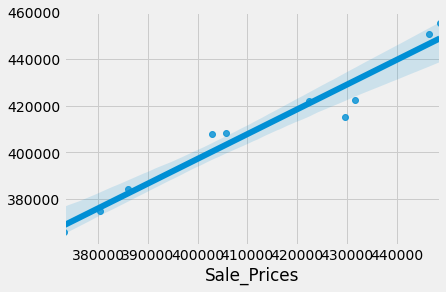

In [248]:
sns.regplot(y_test,lr_prediction)

C:\Users\owner\anaconda3\envs\ml_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



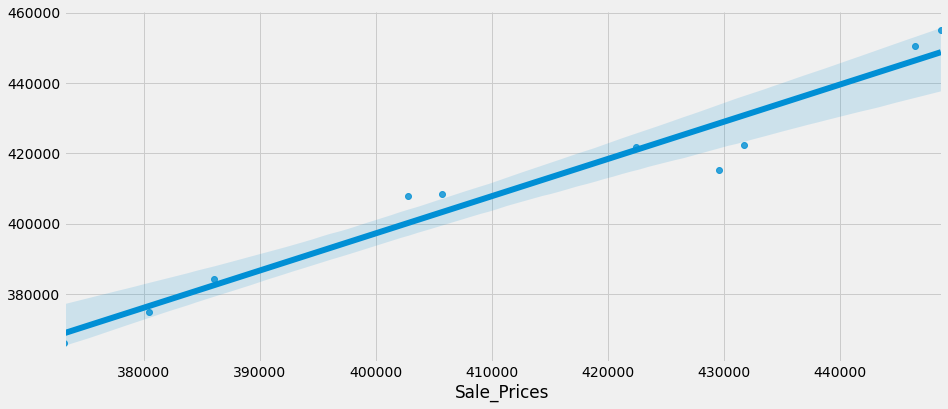

In [258]:
g = sns.regplot(y_test,lr_prediction)
g.figure.set_size_inches(14, 6)
plt.savefig('regression-plot')
sns.despine()

In [261]:
x_train_sm = sm.add_constant(x_train)

x_train_sm = sm.add_constant(x_train)
ls = sm.OLS(y_train,x_train_sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:            Sale_Prices   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     188.8
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           2.73e-21
Time:                        03:53:27   Log-Likelihood:                -359.64
No. Observations:                  36   AIC:                             729.3
Df Residuals:                      31   BIC:                             737.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [235]:
X.columns

Index(['DaysOnZillow_AllHomes', 'InventoryRaw_AllHomes',
       'MedianRentalPrice_AllHomes', 'Sale_Counts'],
      dtype='object')

In [237]:
cols.head()

,DaysOnZillow_AllHomes,InventoryRaw_AllHomes,MedianRentalPrice_AllHomes,Sale_Counts,Sale_Prices
10669,73.75,68428.0,1900.0,33387.0,366100.0
10721,78.75,62335.0,1900.0,26651.0,367700.0
10773,75.25,66856.0,1850.0,26509.0,369900.0
10825,66.50,70808.0,1850.0,32538.0,373100.0
10877,62.25,76157.0,1850.0,38210.0,375700.0


In [241]:
np.where(X.columns==80)[0][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [239]:
#lets now do some property price prediction 
def predict_price(days_listed,inventory,rental_price,sale_count):    
    loc_index = np.where(X.columns==DaysOnZillow_AllHomes)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = DaysOnZillow_AllHomes
    x[1] = InventoryRaw_AllHomes
    x[2] = MedianRentalPrice_AllHomes
    x[3] = Sale_Counts
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [240]:
predict_price(70, 65000,1700, 30000)

NameError: name 'DaysOnZillow_AllHomes' is not defined